<a href="https://colab.research.google.com/github/gongbububu/gongbububu/blob/main/%EC%A0%84%EA%B7%B9%EB%AA%A8%EC%82%AC(MWCNT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LFP Î∞∞Ïπò ÏúÑÏπò: (5.48, 9.82), Î∞òÏßÄÎ¶Ñ: 2.46, Í∏∞Í≥µÎ•†: 80.06%
LFP Î∞∞Ïπò ÏúÑÏπò: (7.02, 2.10), Î∞òÏßÄÎ¶Ñ: 2.14, Í∏∞Í≥µÎ•†: 64.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (-0.04, 2.48), Î∞òÏßÄÎ¶Ñ: 2.47, Í∏∞Í≥µÎ•†: 44.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 7.38), Î∞òÏßÄÎ¶Ñ: 2.03, Í∏∞Í≥µÎ•†: 31.18%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.73, 0.20), Î∞òÏßÄÎ¶Ñ: 1.40, Í∏∞Í≥µÎ•†: 24.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.16, 6.81), Î∞òÏßÄÎ¶Ñ: 1.40, Í∏∞Í≥µÎ•†: 18.23%
LFP Î∞∞Ïπò ÏúÑÏπò: (6.15, 5.75), Î∞òÏßÄÎ¶Ñ: 1.31, Í∏∞Í≥µÎ•†: 12.84%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.71, 4.32), Î∞òÏßÄÎ¶Ñ: 1.30, Í∏∞Í≥µÎ•†: 7.53%
Final porosity: 7.53%


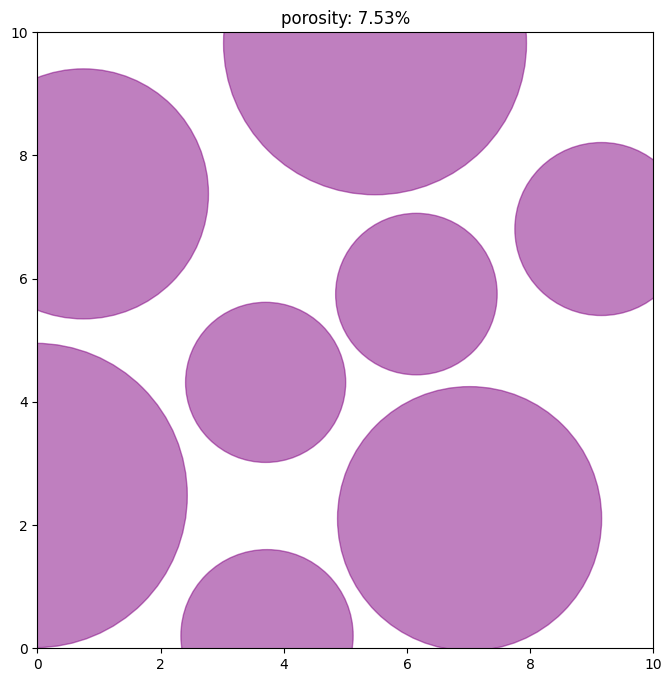

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi
import random

# ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
np.random.seed(4)

# ÏõêÏùò Î©¥Ï†Å Í≥ÑÏÇ∞ Ìï®Ïàò (ÏûòÎ¶∞ ÏõêÏùÑ Ìè¨Ìï®Ìïú Í≥ÑÏÇ∞)
def circle_rect_area(x, y, r, domain_size):
    if 0 <= x - r and x + r <= domain_size and 0 <= y - r and y + r <= domain_size:
        return pi * r**2
    else:
        return pi * r**2 * 1.05

# LFP Î∞∞Ïπò Ìï®Ïàò
def increase_radius_to_target_porosity(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts=10000):
    lfp_positions = []
    total_area = domain_size ** 2
    max_occupied_area = total_area * (1 - target_porosity)
    occupied_area = 0
    attempts = 0

    while occupied_area < max_occupied_area and attempts < max_attempts:
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        x = np.random.uniform(-0.1, domain_size + 0.1)
        y = np.random.uniform(-0.1, domain_size + 0.1)

        overlap = False
        for lx, ly, lr in lfp_positions:
            dist = np.hypot(x - lx, y - ly)
            if dist < (r_LFP + lr) * 1.05:
                overlap = True
                break

        if not overlap:
            lfp_positions.append((x, y, r_LFP))
            occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
            print(f"LFP Î∞∞Ïπò ÏúÑÏπò: ({x:.2f}, {y:.2f}), Î∞òÏßÄÎ¶Ñ: {r_LFP:.2f}, Í∏∞Í≥µÎ•†: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    while occupied_area < max_occupied_area and attempts < max_attempts:
        lfp_positions.sort(key=lambda x: x[2])

        for i in range(len(lfp_positions)):
            lx, ly, lr = lfp_positions[i]
            if lr < max_r_LFP:
                new_lr = lr + 0.07
                overlap = False
                for j in range(len(lfp_positions)):
                    if i != j:
                        lpx, lpy, lpr = lfp_positions[j]
                        dist = np.hypot(lx - lpx, ly - lpy)
                        if dist < (new_lr + lpr) * 1.05:
                            overlap = True
                            break

                if not overlap:
                    lfp_positions[i] = (lx, ly, new_lr)
                    occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
                    print(f"LFP Î∞∞Ïπò ÏúÑÏπò: ({lx:.2f}, {ly:.2f}), Î∞òÏßÄÎ¶Ñ: {new_lr:.2f}, Í∏∞Í≥µÎ•†: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    occupied_area = sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions)
    porosity = 1 - occupied_area / total_area
    print(f"Final porosity: {porosity:.2%}")

    return lfp_positions

# ÏòàÏãú ÏÇ¨Ïö©
domain_size = 10
target_porosity = 0.1
lfp_positions = increase_radius_to_target_porosity(domain_size, target_porosity=target_porosity)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
for (lx, ly, lr) in lfp_positions:
    circle = patches.Circle((lx, ly), lr, color='purple', alpha=0.5)
    plt.gca().add_artist(circle)
plt.xlim(0, domain_size)
plt.ylim(0, domain_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"porosity: {1 - sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions) / (domain_size ** 2):.2%}")
plt.show()


MWCNT Î∞∞Ïπò ÏôÑÎ£å: 2013Í∞ú, Ï¥ù Í∏∏Ïù¥: 400.10 Œºm


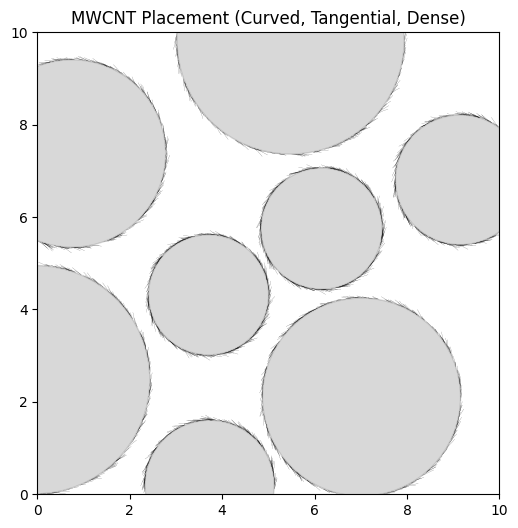

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)

# 1. Í≥°ÏÑ† ÏÉùÏÑ± Ìï®Ïàò (Í≥°Î•† Ï†êÏßÑ Í∞êÏÜå Î∞òÏòÅ)
def generate_mwcnt_curve(start_x, start_y, length, init_angle=None, max_delta_theta_deg=15, segment_len=0.05):
    n_segments = int(length / segment_len)
    points = [(start_x, start_y)]

    angle = init_angle if init_angle is not None else np.random.uniform(0, 2 * np.pi)

    for i in range(n_segments):
        progress_ratio = i / n_segments
        delta_theta_deg = max_delta_theta_deg * (1 - progress_ratio)  # Ï†êÏ†ê Ï§ÑÏñ¥ÎìúÎäî Í≥°Î•†
        angle += np.deg2rad(np.random.uniform(-delta_theta_deg, delta_theta_deg))

        dx = segment_len * np.cos(angle)
        dy = segment_len * np.sin(angle)
        x_new = points[-1][0] + dx
        y_new = points[-1][1] + dy
        points.append((x_new, y_new))

    return points

# 2. MWCNT Î∞∞Ïπò Ìï®Ïàò
def place_mwcnts(domain_size, lfp_positions, target_total_length, max_attempts=10000000):
    mwcnt_paths = []
    total_length = 0
    attempts = 0

    while total_length < target_total_length and attempts < max_attempts:
        lx, ly, lr = lfp_positions[np.random.randint(0, len(lfp_positions))]
        angle_surface = np.random.uniform(0, 2 * np.pi)
        distance_from_edge = np.random.uniform(0.002, 0.01)  # Îçî Í∞ÄÍπåÏù¥

        x0 = lx + (lr + distance_from_edge) * np.cos(angle_surface)
        y0 = ly + (lr + distance_from_edge) * np.sin(angle_surface)

        if not (0 <= x0 <= domain_size and 0 <= y0 <= domain_size):
            attempts += 1
            continue

        tangent_angle = angle_surface + np.pi / 2

        length = np.random.uniform(0.1, 0.3)  # ÏßßÏùÄ Í∏∏Ïù¥ Îã§Ïàò Î∞∞Ïπò Ï†ÑÎûµ
        path = generate_mwcnt_curve(x0, y0, length, init_angle=tangent_angle)

        if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
            attempts += 1
            continue

        too_close = False
        for px, py in path:
            for ox, oy, orad in lfp_positions:
                if np.hypot(px - ox, py - oy) < orad + 0.002:  # Îß§Ïö∞ Î∞ÄÏ†ë ÌóàÏö©
                    too_close = True
                    break
            if too_close:
                break
        if too_close:
            attempts += 1
            continue

        mwcnt_paths.append(path)
        total_length += length
        attempts += 1

    print(f"MWCNT Î∞∞Ïπò ÏôÑÎ£å: {len(mwcnt_paths)}Í∞ú, Ï¥ù Í∏∏Ïù¥: {total_length:.2f} Œºm")
    return mwcnt_paths

# 3. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)

    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.3)
        ax.add_patch(circle)

    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.1)

    ax.set_aspect('equal')
    plt.title("MWCNT Placement (Curved, Tangential, Dense)")
    plt.show()

# 4. Ïã§Ìñâ
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5


    mwcnt_paths = place_mwcnts(domain_size, lfp_positions, target_total_length=400.0)  # Îçî ÎßéÏùÄ Í∏∏Ïù¥
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)


‚úÖ MWCNT Î∞∞Ïπò ÏôÑÎ£å: 3745Í∞ú, Ï¥ù Í∏∏Ïù¥: 150.01 Œºm


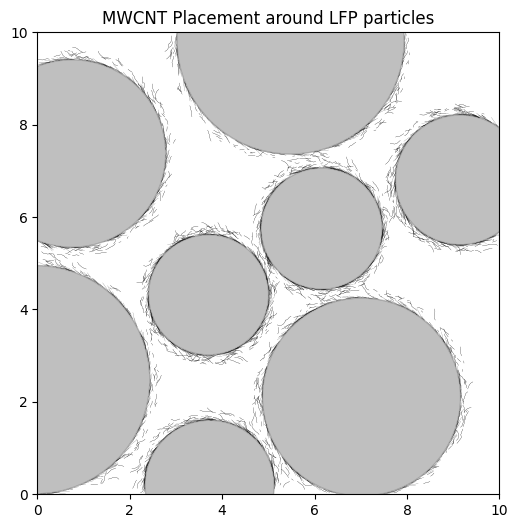

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(6)


# 2. Í≥°ÏÑ† ÏÉùÏÑ± Ìï®Ïàò (Ï¥àÍ∏∞ Í∞ÅÎèÑ ÏûÖÎ†• Í∞ÄÎä•)
def generate_mwcnt_curve(start_x, start_y, length, delta_theta_deg=30, segment_len=0.05, init_angle=None):
    n_segments = int(length / segment_len)
    points = [(start_x, start_y)]

    angle = init_angle if init_angle is not None else np.random.uniform(0, 2 * np.pi)

    for i in range(n_segments):
        angle += np.deg2rad(np.random.uniform(-delta_theta_deg, delta_theta_deg))
        dx = segment_len * np.cos(angle)
        dy = segment_len * np.sin(angle)
        x_new = points[-1][0] + dx
        y_new = points[-1][1] + dy
        points.append((x_new, y_new))

    return points

# 3. MWCNT Î∞∞Ïπò Ìï®Ïàò (Ï†ëÏÑ† Î∞©Ìñ• ÏãúÏûë)
def place_mwcnts(domain_size, lfp_positions, target_total_length, max_attempts=10000):
    #mwcnt_paths = []
    total_length = 0
    attempts = 0

    while total_length < target_total_length and attempts < max_attempts:
        lx, ly, lr = lfp_positions[np.random.randint(0, len(lfp_positions))]
        angle = np.random.uniform(0, 2 * np.pi)
        distance_from_edge = np.random.uniform(0.01, 0.2)
        x0 = lx + (lr + distance_from_edge) * np.cos(angle)
        y0 = ly + (lr + distance_from_edge) * np.sin(angle)

        if not (0 <= x0 <= domain_size and 0 <= y0 <= domain_size):
            attempts += 1
            continue

        length = np.random.uniform(0.05, 0.3)
        tangent_angle = angle + np.pi / 2

        path = generate_mwcnt_curve(x0, y0, length, delta_theta_deg=30, init_angle=tangent_angle)

        if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
            attempts += 1
            continue

        too_close = False
        for px, py in path:
            for ox, oy, orad in lfp_positions:
                if np.hypot(px - ox, py - oy) < orad + 0.01:
                    too_close = True
                    break
            if too_close:
                break
        if too_close:
            attempts += 1
            continue

        mwcnt_paths.append(path)
        total_length += length
        attempts += 1

    print(f"‚úÖ MWCNT Î∞∞Ïπò ÏôÑÎ£å: {len(mwcnt_paths)}Í∞ú, Ï¥ù Í∏∏Ïù¥: {total_length:.2f} Œºm")
    return mwcnt_paths

# 4. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)

    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.5)
        ax.add_patch(circle)

    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.1)

    ax.set_aspect('equal')
    plt.title("MWCNT Placement around LFP particles")
    plt.show()

# 5. Ï†ÑÏ≤¥ Ïã§Ìñâ
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5


    mwcnt_paths = place_mwcnts(domain_size, lfp_positions, target_total_length=150.0)
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)



In [ ]:
def place_mwcnts_between_lfp_pairs_safe(domain_size, lfp_positions, num_lines=1, length=0.3, buffer=0.05):
    import itertools
    mwcnt_paths = []

    for (x1, y1, r1), (x2, y2, r2) in itertools.combinations(lfp_positions, 2):
        dx, dy = x2 - x1, y2 - y1
        dist = np.hypot(dx, dy)

        if dist < r1 + r2 + buffer * 2:
            continue  # ÏûÖÏûêÎÅºÎ¶¨ ÎÑàÎ¨¥ Í∞ÄÍπåÏõåÏÑú MWCNT ÎÑ£ÏùÑ ÌãàÏù¥ ÏóÜÏùå

        # Ï§ëÏã¨ Î∞©Ìñ• Î≤°ÌÑ∞ Î∞è ÏàòÏßÅ Î≤°ÌÑ∞
        ux, uy = dx / dist, dy / dist
        tx, ty = -uy, ux  # Ï†ëÏÑ† Î∞©Ìñ• Îã®ÏúÑÎ≤°ÌÑ∞

        # ÏãúÏûëÏ†ê: ÏûÖÏûê ÌëúÎ©¥ÏóêÏÑú buffer ÎßåÌÅº Îñ®Ïñ¥ÏßÑ ÏßÄÏ†ê
        offset_from_p1 = r1 + buffer + 0.1 * np.random.rand()
        offset_from_p2 = r2 + buffer + 0.1 * np.random.rand()
        mid_x = x1 + ux * offset_from_p1 + (x2 - x1 - ux * (offset_from_p1 + offset_from_p2)) / 2
        mid_y = y1 + uy * offset_from_p1 + (y2 - y1 - uy * (offset_from_p1 + offset_from_p2)) / 2

        for i in range(num_lines):
            lateral_shift = (i - num_lines // 2) * 0.05
            sx = mid_x + lateral_shift * tx
            sy = mid_y + lateral_shift * ty

            init_angle = np.arctan2(ty, tx)
            path = generate_mwcnt_curve(sx, sy, length, delta_theta_deg=20, init_angle=init_angle)

            # ÎèÑÎ©îÏù∏ Î∞ñ ÎòêÎäî LFPÏôÄ Ï∂©Îèå Í≤ÄÏÇ¨
            if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
                continue

            overlapped = False
            for px, py in path:
                for ox, oy, orad in lfp_positions:
                    if np.hypot(px - ox, py - oy) < orad + buffer:
                        overlapped = True
                        break
                if overlapped:
                    break
            if not overlapped:
                mwcnt_paths.append(path)

    print(f"üîó ÏïàÏ†ÑÌïòÍ≤å Î∞∞ÏπòÎêú LFP ÏÇ¨Ïù¥ MWCNT Ïàò: {len(mwcnt_paths)}")
    return mwcnt_paths


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

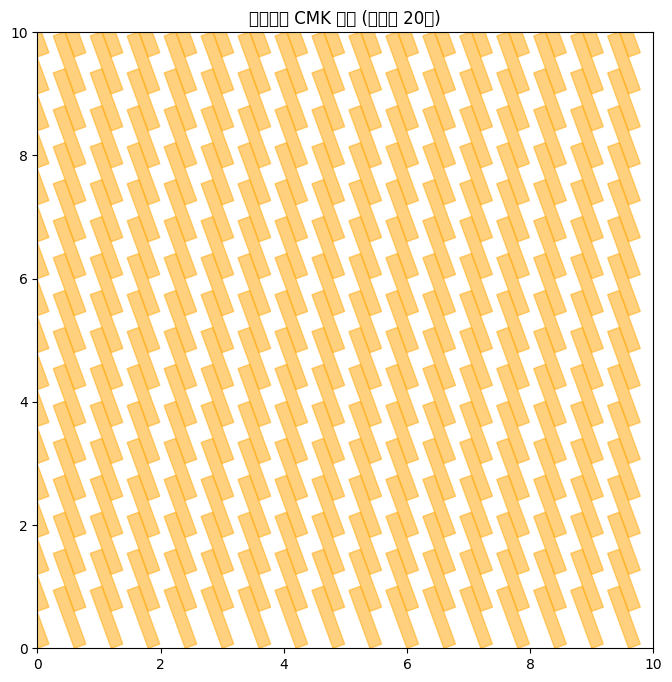

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# ÎèÑÎ©îÏù∏ ÌÅ¨Í∏∞
domain_size = 10.0

# CMK ÌååÎùºÎØ∏ÌÑ∞
cmk_width = 0.2         # Íµ¨Î©ç ÎÑàÎπÑ
cmk_height = 1.0        # Íµ¨Î©ç Í∏∏Ïù¥
x_spacing = 0.6         # Í∞ÄÎ°ú Í∞ÑÍ≤©
y_spacing = 0.6         # ÏÑ∏Î°ú Í∞ÑÍ≤©
cmk_angle = 20          # Í∏∞Ïö∏Í∏∞ (degree)

# CMK Î∞∞Ïπò Ìï®Ïàò
def place_slanted_cmk(domain_size, cmk_width, cmk_height, x_spacing, y_spacing, angle_deg):
    cmk_rects = []
    angle_rad = np.deg2rad(angle_deg)

    x_positions = np.arange(0, domain_size, x_spacing)
    y_positions = np.arange(0, domain_size, y_spacing)

    for x in x_positions:
        for y in y_positions:
            rect = patches.Rectangle(
                (x, y),
                cmk_width,
                cmk_height,
                angle=angle_deg,
                color='orange',
                alpha=0.5
            )
            cmk_rects.append(rect)
    return cmk_rects

# Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, domain_size)
ax.set_ylim(0, domain_size)
ax.set_aspect('equal')

# CMK Íµ¨Ï°∞ Î∞∞Ïπò Î∞è Ï∂îÍ∞Ä
cmk_rects = place_slanted_cmk(domain_size, cmk_width, cmk_height, x_spacing, y_spacing, cmk_angle)
for rect in cmk_rects:
    ax.add_patch(rect)

plt.title(f"Í∏∞Ïö∏Ïñ¥ÏßÑ CMK Íµ¨Ï°∞ (Í∏∞Ïö∏Í∏∞ {cmk_angle}ÎèÑ)")
plt.show()


MWCNT Î∞∞Ïπò ÏôÑÎ£å: 4156Í∞ú, Ï¥ù Í∏∏Ïù¥: 200.54 Œºm


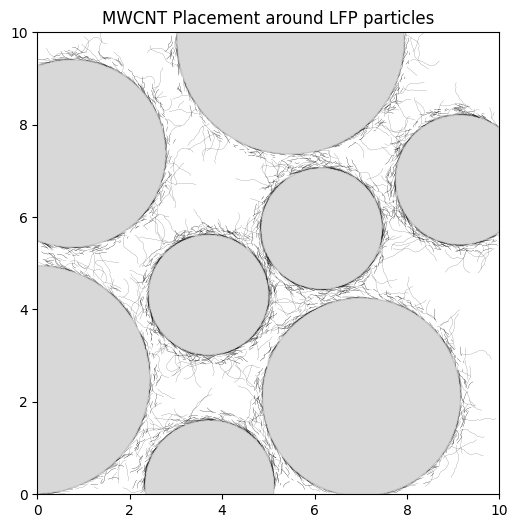

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)
# 2. Í≥°ÏÑ† ÏÉùÏÑ± Ìï®Ïàò
def generate_mwcnt_curve(start_x, start_y, length, delta_theta_deg=30, segment_len=0.05):
    n_segments = int(length / segment_len)
    points = [(start_x, start_y)]
    angle = np.random.uniform(0, 2 * np.pi)

    for _ in range(n_segments):
        angle += np.deg2rad(np.random.uniform(-delta_theta_deg, delta_theta_deg))
        dx = segment_len * np.cos(angle)
        dy = segment_len * np.sin(angle)
        x_new = points[-1][0] + dx
        y_new = points[-1][1] + dy
        points.append((x_new, y_new))

    return points

# 3. MWCNT Î∞∞Ïπò Ìï®Ïàò
def place_mwcnts(domain_size, lfp_positions, target_total_length, max_attempts=10000000):
    #mwcnt_paths = []
    total_length = 0
    attempts = 0

    while total_length < target_total_length and attempts < max_attempts:
        lx, ly, lr = lfp_positions[np.random.randint(0, len(lfp_positions))]
        angle = np.random.uniform(0, 2 * np.pi)
        distance_from_edge = np.random.uniform(0.01, 0.2)
        x0 = lx + (lr + distance_from_edge) * np.cos(angle)
        y0 = ly + (lr + distance_from_edge) * np.sin(angle)

        if not (0 <= x0 <= domain_size and 0 <= y0 <= domain_size):
            attempts += 1
            continue

        length = np.random.uniform(0.1, 0.9)
        path = generate_mwcnt_curve(x0, y0, length)

        if any((x < 0 or x > domain_size or y < 0 or y > domain_size) for x, y in path):
            attempts += 1
            continue

        too_close = False
        for px, py in path:
            for ox, oy, orad in lfp_positions:
                if np.hypot(px - ox, py - oy) < orad + 0.01:
                    too_close = True
                    break
            if too_close:
                break
        if too_close:
            attempts += 1
            continue

        mwcnt_paths.append(path)
        total_length += length
        attempts += 1

    print(f"MWCNT Î∞∞Ïπò ÏôÑÎ£å: {len(mwcnt_paths)}Í∞ú, Ï¥ù Í∏∏Ïù¥: {total_length:.2f} Œºm")
    return mwcnt_paths

# 4. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)

    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.3)
        ax.add_patch(circle)

    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.1)

    ax.set_aspect('equal')
    plt.title("MWCNT Placement around LFP particles")
    plt.show()


# 5. Ï†ÑÏ≤¥ Ïã§Ìñâ
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5


    mwcnt_paths = place_mwcnts(domain_size, lfp_positions, target_total_length=200.0)
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)


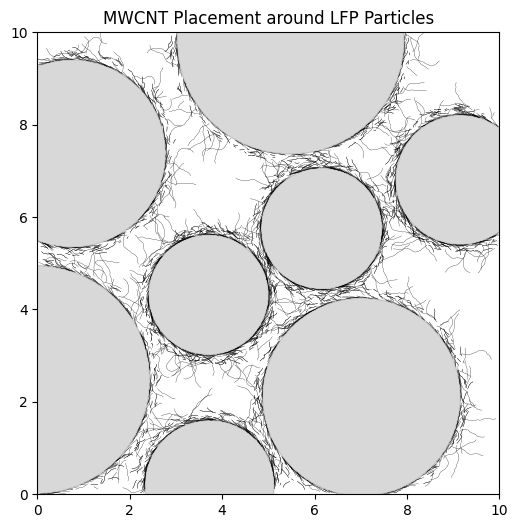

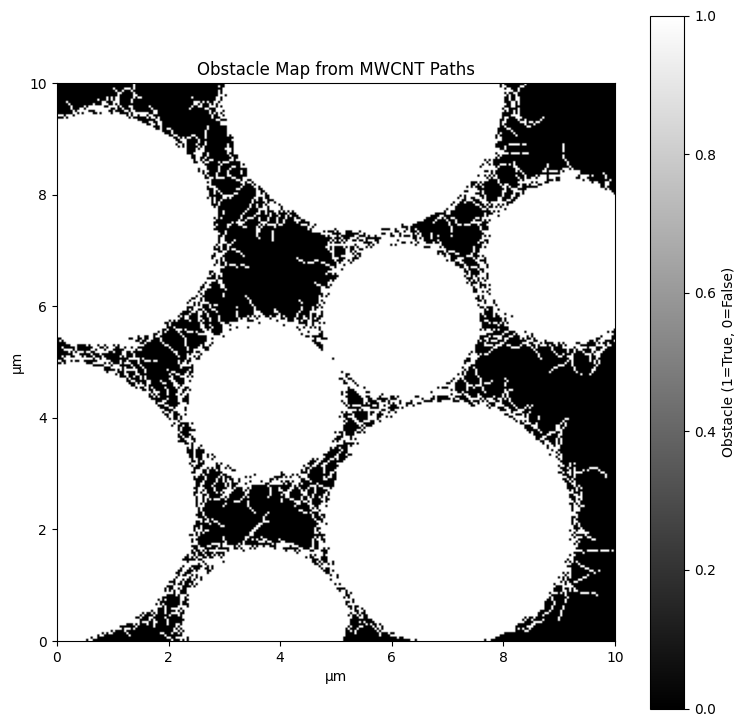

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)



# 4. Ïû•Ïï†Î¨º Îßµ ÏóÖÎç∞Ïù¥Ìä∏ Ìï®Ïàò
def update_obstacle_map(mwcnt_paths, obstacle_map, resolution):
    for path in mwcnt_paths:
        for x, y in path:
            i = int(y / resolution)
            j = int(x / resolution)
            if 0 <= i < obstacle_map.shape[0] and 0 <= j < obstacle_map.shape[1]:
                obstacle_map[i, j] = 1

# 5. MWCNT + LFP ÏãúÍ∞ÅÌôî
def plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    for x, y, r in lfp_positions:
        circle = plt.Circle((x, y), r, color='gray', alpha=0.3)
        ax.add_patch(circle)
    for path in mwcnt_paths:
        xs, ys = zip(*path)
        ax.plot(xs, ys, color='black', linewidth=0.2)
    ax.set_aspect('equal')
    plt.title("MWCNT Placement around LFP Particles")
    plt.show()

def add_lfp_to_obstacle_map(lfp_positions, obstacle_map, resolution):
    for x, y, r in lfp_positions:
        i_center = int(y / resolution)
        j_center = int(x / resolution)
        r_grid = int(r / resolution)
        for di in range(-r_grid, r_grid + 1):
            for dj in range(-r_grid, r_grid + 1):
                ii = i_center + di
                jj = j_center + dj
                if 0 <= ii < obstacle_map.shape[0] and 0 <= jj < obstacle_map.shape[1]:
                    dy = (ii + 0.5) * resolution - y
                    dx = (jj + 0.5) * resolution - x
                    if dx**2 + dy**2 <= r**2:
                        obstacle_map[ii, jj] = 1


# 6. Ïû•Ïï†Î¨º Îßµ ÏãúÍ∞ÅÌôî
def plot_obstacle_map(obstacle_map, domain_size):
    plt.figure(figsize=(9, 9))
    plt.imshow(obstacle_map, cmap='gray', origin='lower', extent=[0, domain_size, 0, domain_size])
    plt.title("Obstacle Map from MWCNT Paths")
    plt.xlabel("Œºm")
    plt.ylabel("Œºm")
    plt.colorbar(label="Obstacle (1=True, 0=False)")
    plt.show()

# 7. Ï†ÑÏ≤¥ Ïã§Ìñâ
if __name__ == "__main__":
    domain_size = 10.0
    r_lfp = 1.0
    n_lfp = 5
    resolution = 0.04




    # ÏãúÍ∞ÅÌôî
    plot_mwcnt_paths(domain_size, lfp_positions, mwcnt_paths)

    # Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±
    grid_size = int(domain_size / resolution)
    obstacle_map = np.zeros((grid_size, grid_size), dtype=np.uint8)
    update_obstacle_map(mwcnt_paths, obstacle_map, resolution)
    add_lfp_to_obstacle_map(lfp_positions, obstacle_map, resolution)

    # Ïû•Ïï†Î¨º Îßµ ÏãúÍ∞ÅÌôî
    plot_obstacle_map(obstacle_map, domain_size)


In [ ]:
import numpy as np

# Ïû•Ïï†Î¨ºÏù¥ ÏóÜÎäî Í≥≥Ïùò Ïù∏Îç±Ïä§Î•º Ï∞æÍ∏∞
free_space = np.where(obstacle_map == 0)

# free_spaceÎäî x, y Ïù∏Îç±Ïä§ Î∞∞Ïó¥Î°ú Î∞òÌôòÎê©ÎãàÎã§
x_free, y_free = free_space

# Ïù¥Ï†ú x_free, y_freeÎäî Î¶¨Ìä¨Ïù¥Ïò®Ïù¥ Ï∂úÎ∞úÌï† Ïàò ÏûàÎäî (x, y) Ï¢åÌëúÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
def calculate_porosity(map_array):
    # 0Ïùò Í∞úÏàò (ÎπÑÏñ¥ ÏûàÎäî Í≥µÍ∞Ñ)
    empty_space = np.sum(map_array == 0)
    # Ï¥ù ÏõêÏÜå Í∞úÏàò
    total_space = map_array.size
    # Í∏∞Í≥µÎ•† = ÎπÑÏñ¥ ÏûàÎäî Í≥µÍ∞Ñ / Ï¥ù Í≥µÍ∞Ñ
    porosity = empty_space / total_space
    return porosity

# Í∏∞Í≥µÎ•† Ï∂úÎ†•
porosity = calculate_porosity(obstacle_map)
print(f"Í∏∞Í≥µÎ•†: {porosity}")

Í∏∞Í≥µÎ•†: 0.291696


(250, 250)


<ipython-input-119-001fdb5ee46a>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


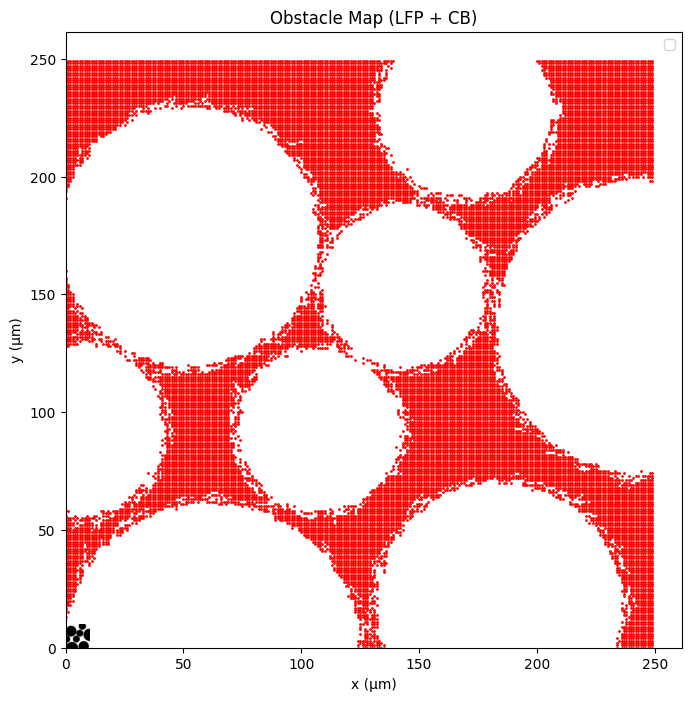

In [ ]:
domain_size = 10
print(obstacle_map.shape)
plt.figure(figsize=(8, 8))
plt.imshow(obstacle_map.T, origin='lower', cmap='Greys', extent=[0, domain_size, 0, domain_size])
plt.title("Obstacle Map (LFP + CB)")
plt.xlabel("x (Œºm)")
plt.ylabel("y (Œºm)")

#Ïú†Ìö®Ìïú Í≤ΩÍ≥Ñ Ï†ê Í∑∏Î¶¨Í∏∞
plt.scatter(x_free, y_free, color='red', s=1)

plt.legend()
plt.grid(False)
plt.show()

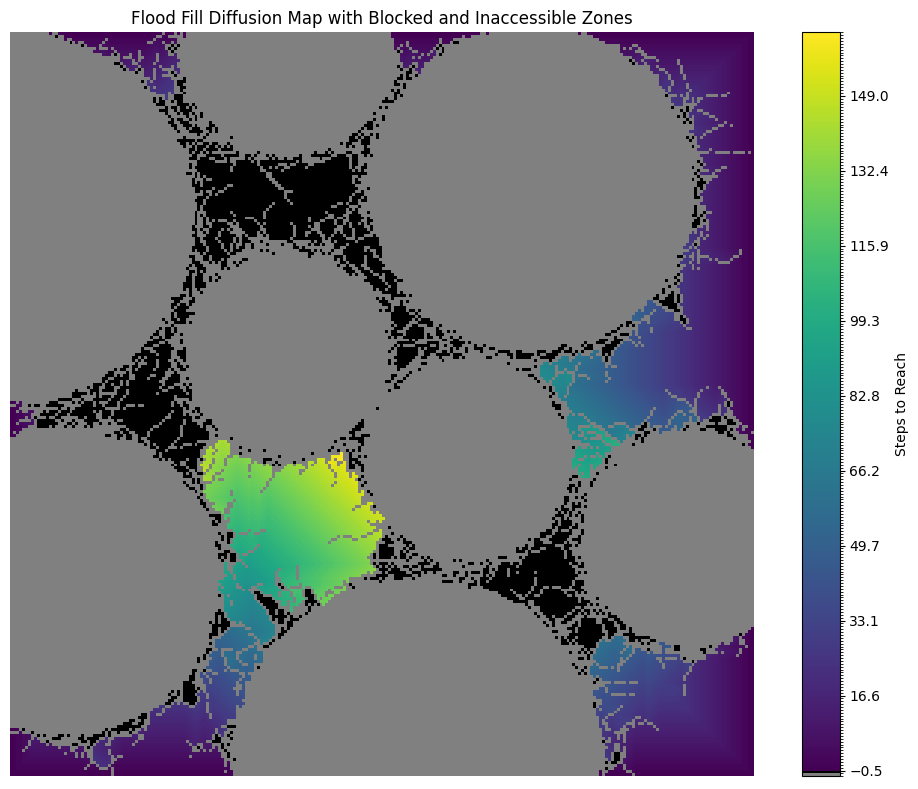

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.colors import ListedColormap, BoundaryNorm

# Flood Fill ÏïåÍ≥†Î¶¨Ï¶ò
def flood_fill_time_map(obstacle_map, start_points):
    h, w = obstacle_map.shape
    time_map = np.full((h, w), np.inf)
    visited = np.zeros((h, w), dtype=bool)
    queue = deque()

    for y, x in start_points:
        if obstacle_map[y, x] == 0:
            queue.append((y, x, 0))
            time_map[y, x] = 0
            visited[y, x] = True

    while queue:
        y, x, t = queue.popleft()
        for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < h and 0 <= nx < w:
                if not visited[ny, nx] and obstacle_map[ny, nx] == 0:
                    visited[ny, nx] = True
                    time_map[ny, nx] = t + 1
                    queue.append((ny, nx, t + 1))
    return time_map

# Í∞ÄÏû•ÏûêÎ¶¨ÏóêÏÑú ÏãúÏûëÏ†ê Ï∞æÍ∏∞
def get_edge_starts(obstacle_map):
    starts = []
    h, w = obstacle_map.shape
    for i in range(h):
        if obstacle_map[i, 0] == 0:
            starts.append((i, 0))
        if obstacle_map[i, w-1] == 0:
            starts.append((i, w-1))
    for j in range(w):
        if obstacle_map[0, j] == 0:
            starts.append((0, j))
        if obstacle_map[h-1, j] == 0:
            starts.append((h-1, j))
    return starts

# Flood Fill Ïã§Ìñâ
start_points = get_edge_starts(obstacle_map)
time_map = flood_fill_time_map(obstacle_map, start_points)

# ÏãúÍ∞ÅÌôîÏö© Îßµ ÏÉùÏÑ±
visual_map = np.zeros_like(time_map)
visual_map[~np.isinf(time_map)] = time_map[~np.isinf(time_map)]                  # ÎèÑÎã¨ Í∞ÄÎä•
visual_map[(np.isinf(time_map)) & (obstacle_map == 0)] = -1                      # Îπà Í≥µÍ∞ÑÏù¥ÏßÄÎßå ÎèÑÎã¨ Î™ªÌï®
visual_map[obstacle_map == 1] = -2                                               # ÏûÖÏûê

# ÏÉâÏÉÅ Ï†ïÏùò
cmap_colors = [
    'grey',          # -2: ÏûÖÏûê
    'black',      # -1: ÎèÑÎã¨ Î™ªÌïú Îπà Í≥µÍ∞Ñ
    *plt.cm.viridis(np.linspace(0, 1, 256))  # ÎÇòÎ®∏ÏßÄ ÌçºÏßê Í≤ΩÎ°ú
]
cmap = ListedColormap(cmap_colors)

# Î≤îÏúÑ Î∞è ÏÉâÏÉÅ Ï†ïÍ∑úÌôî
max_time = np.nanmax(time_map[~np.isinf(time_map)])
bounds = [-2.5, -1.5, -0.5] + list(np.linspace(0, max_time, 257)[1:])
norm = BoundaryNorm(bounds, cmap.N)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.imshow(visual_map, cmap=cmap, norm=norm, interpolation='nearest')
plt.title("Flood Fill Diffusion Map with Blocked and Inaccessible Zones")
plt.colorbar(label='Steps to Reach')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Ï†ÑÌï¥ÏßàÏù¥ Ï°¥Ïû¨ÌïòÎäî ÏòÅÏó≠ (ÏûÖÏûêÍ∞Ä ÏóÜÎäî Î∂ÄÎ∂Ñ)
electrolyte_mask = (obstacle_map == 0)

# Í∑∏ Ï§ë ÎèÑÎã¨ Í∞ÄÎä•Ìïú ÏòÅÏó≠
reachable_mask = (~np.isinf(time_map)) & electrolyte_mask

# ÎèÑÎã¨ Í∞ÄÎä• ÎπÑÏú® Í≥ÑÏÇ∞
total_electrolyte_voxels = np.sum(electrolyte_mask)
reachable_voxels = np.sum(reachable_mask)
reachable_ratio = reachable_voxels / total_electrolyte_voxels * 100

# ÌèâÍ∑† ÎèÑÎã¨ ÏãúÍ∞ÑÍ≥º ÌëúÏ§ÄÌé∏Ï∞® (ÎèÑÎã¨ Í∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà ÏòÅÏó≠Îßå)
average_steps = np.mean(time_map[reachable_mask])
std_steps = np.std(time_map[reachable_mask])

# Í≤∞Í≥º Ï∂úÎ†•
print("üîç Ï†ïÌôïÌïú ÌÜµÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º (Ï†ÑÌï¥Ïßà ÏòÅÏó≠ Í∏∞Ï§Ä)")
print(f"1. Ï†ÑÌï¥Ïßà ÏòÅÏó≠ ÎèÑÎã¨ Í∞ÄÎä• ÎπÑÏú®: {reachable_ratio:.2f}%")
print(f"2. ÌèâÍ∑† ÎèÑÎã¨ ÏãúÍ∞Ñ: {average_steps:.2f} steps")
print(f"3. ÎèÑÎã¨ ÏãúÍ∞Ñ ÌëúÏ§ÄÌé∏Ï∞®: {std_steps:.2f} steps")


üîç Ï†ïÌôïÌïú ÌÜµÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º (Ï†ÑÌï¥Ïßà ÏòÅÏó≠ Í∏∞Ï§Ä)
1. Ï†ÑÌï¥Ïßà ÏòÅÏó≠ ÎèÑÎã¨ Í∞ÄÎä• ÎπÑÏú®: 68.54%
2. ÌèâÍ∑† ÎèÑÎã¨ ÏãúÍ∞Ñ: 40.54 steps
3. ÎèÑÎã¨ ÏãúÍ∞Ñ ÌëúÏ§ÄÌé∏Ï∞®: 45.27 steps
